In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=32

In [3]:
#print(dataFromSensors)
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475305, 32, 16)
strides:  (4096, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x1e6bddf3040
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475305,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1e731ea3040
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380244

In [9]:
training_sample

380244

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380244, 32, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#print(train_X)

In [14]:
train_y.shape

(380244,)

In [15]:
#print(test_y)

In [16]:
train_y=train_y.reshape(train_y.shape[0],1)

In [17]:
test_y=test_y.reshape(test_y.shape[0],1)

In [18]:
#print(train_X)

In [19]:
# reshape input to be 3D [samples, time steps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1], train_X.shape[2]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1], test_X.shape[2]))



print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380244, 32, 15) (380244, 1) (95061, 32, 15) (95061, 1)


In [20]:
model_gru =  keras.models.Sequential([
   # keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, input_shape=(train_X.shape[1], train_X.shape[2])),
    keras.layers.GRU(256,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    #keras.layers.Flatten(),
   # keras.layers.GRU(units=128,return_sequences=True),
    #keras.layers.GRU(units=64,return_sequences=True,activation='relu'),
    #keras.layers.GRU(units=1,return_sequences=True),
    #keras.layers.Flatten(),
    keras.layers.GRU(units=164,return_sequences=True),
    keras.layers.GRU(units=128,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=64),#,activation='relu'),
    #keras.layers.Flatten(),
    #keras.layers.BatchNormalization(),
   #
  #  keras.layers.GRU(units=3),
 
    #keras.layers.TimeDistributed(keras.layers.Dense(units=36))
    #keras.layers.TimeDistributed(keras.layers.Dense(1))
    keras.layers.Dense(units=128,activation='sigmoid'),
    keras.layers.Dense(units=64,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
opt=keras.optimizers.Adagrad(learning_rate=0.01)
model_gru.compile(loss='binary_crossentropy', optimizer=opt,metrics=['AUC'])

In [21]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32, 256)           209664    
                                                                 
 gru_1 (GRU)                 (None, 32, 164)           207624    
                                                                 
 gru_2 (GRU)                 (None, 32, 128)           112896    
                                                                 
 gru_3 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [22]:
 start = t.time()

In [23]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=110,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/110
2971/2971 [==============================] - 114s 35ms/step - loss: 0.5733 - auc: 0.5261 - val_loss: 0.5573 - val_auc: 0.6339
Epoch 2/110
2971/2971 [==============================] - 104s 35ms/step - loss: 0.5495 - auc: 0.6544 - val_loss: 0.4989 - val_auc: 0.7244
Epoch 3/110
2971/2971 [==============================] - 104s 35ms/step - loss: 0.5060 - auc: 0.7230 - val_loss: 0.4899 - val_auc: 0.7302
Epoch 4/110
2971/2971 [==============================] - 103s 35ms/step - loss: 0.5014 - auc: 0.7242 - val_loss: 0.4845 - val_auc: 0.7313
Epoch 5/110
2971/2971 [==============================] - 103s 35ms/step - loss: 0.4990 - auc: 0.7254 - val_loss: 0.4845 - val_auc: 0.7328
Epoch 6/110
2971/2971 [==============================] - 104s 35ms/step - loss: 0.4972 - auc: 0.7270 - val_loss: 0.4842 - val_auc: 0.7343
Epoch 7/110
2971/2971 [==============================] - 104s 35ms/step - loss: 0.4957 - auc: 0.7287 - val_loss: 0.4793 - val_auc: 0.7360
Epoch 8/110
2971/2971 [===========

2971/2971 [==============================] - 103s 35ms/step - loss: 0.4302 - auc: 0.8241 - val_loss: 0.4266 - val_auc: 0.8177
Epoch 61/110
2971/2971 [==============================] - 104s 35ms/step - loss: 0.4298 - auc: 0.8246 - val_loss: 0.4299 - val_auc: 0.8142
Epoch 62/110
2971/2971 [==============================] - 104s 35ms/step - loss: 0.4294 - auc: 0.8250 - val_loss: 0.4281 - val_auc: 0.8160
Epoch 63/110
2971/2971 [==============================] - 104s 35ms/step - loss: 0.4292 - auc: 0.8251 - val_loss: 0.4256 - val_auc: 0.8188
Epoch 64/110
2971/2971 [==============================] - 103s 35ms/step - loss: 0.4287 - auc: 0.8257 - val_loss: 0.4289 - val_auc: 0.8149
Epoch 65/110
2971/2971 [==============================] - 104s 35ms/step - loss: 0.4284 - auc: 0.8260 - val_loss: 0.4276 - val_auc: 0.8168
Epoch 66/110
2971/2971 [==============================] - 104s 35ms/step - loss: 0.4281 - auc: 0.8263 - val_loss: 0.4289 - val_auc: 0.8157
Epoch 67/110
2971/2971 [================

In [24]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 35s 11ms/step


In [25]:
stop=t.time()-start
print(stop)

11754.44320845604


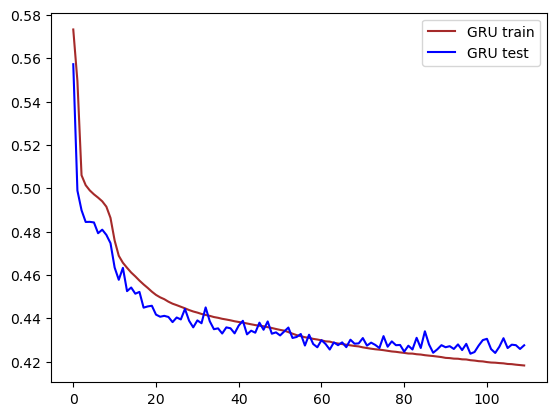

In [26]:
#dont run this cell if you are running this cell than add "validation_data=(test_X, test_y)" in model_gru.fit()
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [27]:
#test_y.reshape(8086,1)
#test_y.reshape(2627,1)
#test_y=test_y[:, :1]

#train_y=test_y[:, :1]
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [28]:
np.shape(pred_y)

(95061, 1)

In [29]:
pred_y

array([[0.00026963],
       [0.00147767],
       [0.00080023],
       ...,
       [0.02402823],
       [0.02441986],
       [0.02453815]], dtype=float32)

In [30]:
#pred_y=np.reshape(pred_y,8068)
pred_y=np.reshape(pred_y,95061)

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)

#plotting predicted test value vs actual test value
plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [32]:
np.shape(train_X)

(380244, 32, 15)

In [33]:
np.shape(train_y)

(380244, 1)

In [34]:
np.shape(test_X)

(95061, 32, 15)

In [35]:
np.shape(test_y)

(95061, 1)

14854/14854 [==============================] - 161s 11ms/step


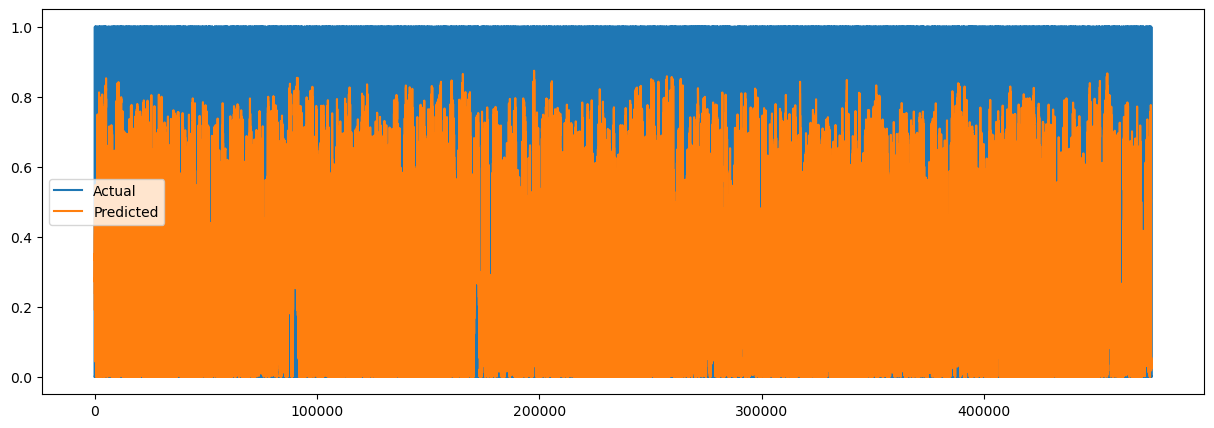

In [36]:
#visualization over full data
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

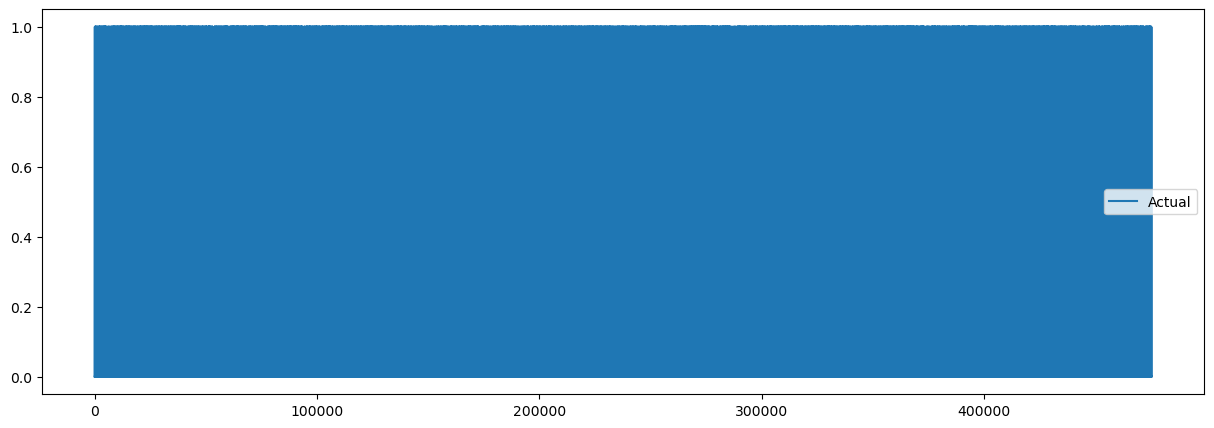

In [37]:
#over small part of data
plt.plot(tes, label = 'Actual')
#plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [38]:
print(sum(tes)/len(tes))

[0.25795437]


In [39]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.60412255]
[0.83111617]
total acc [0.78466248]


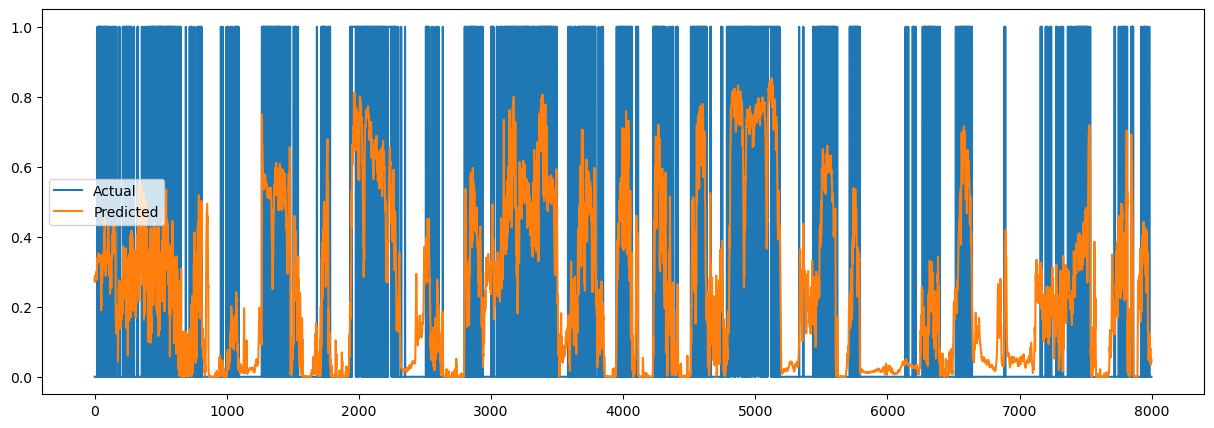

In [40]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

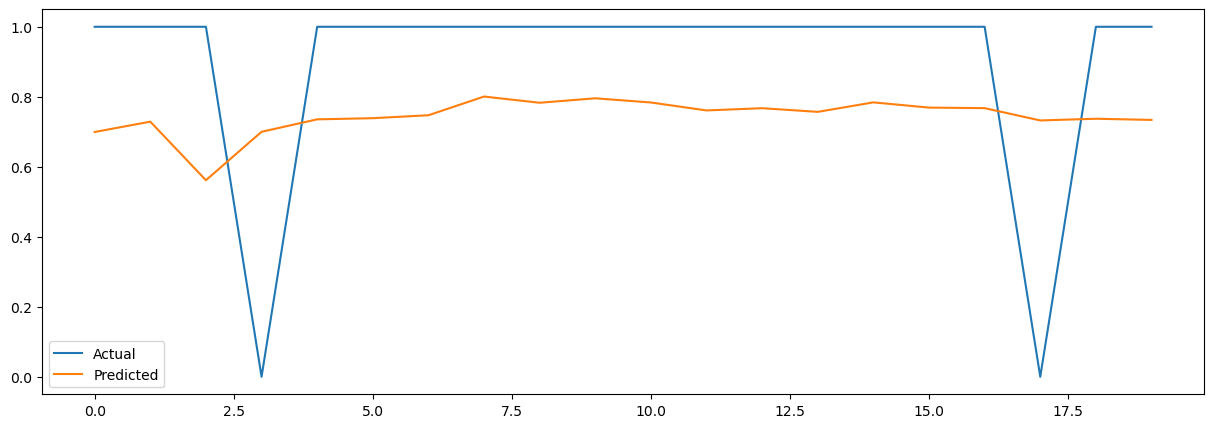

In [41]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

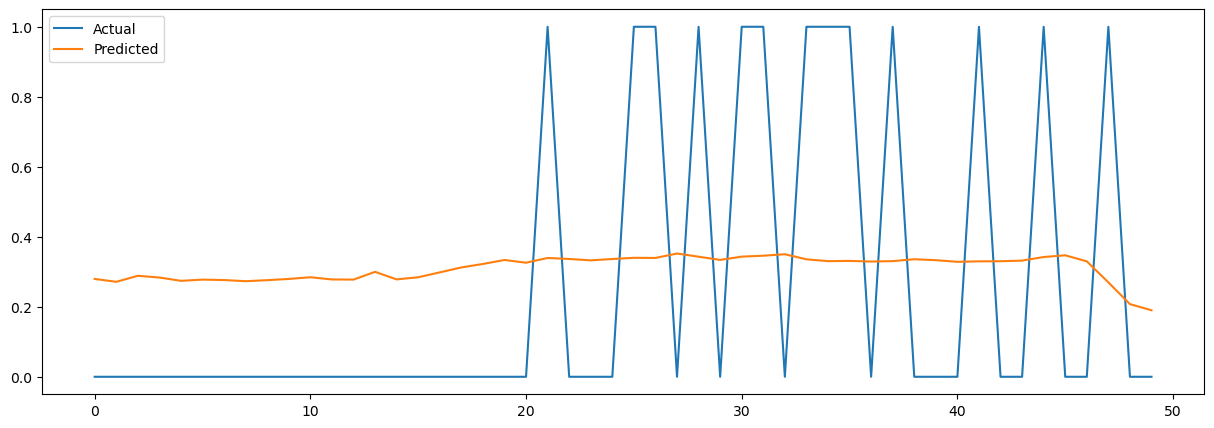

In [42]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

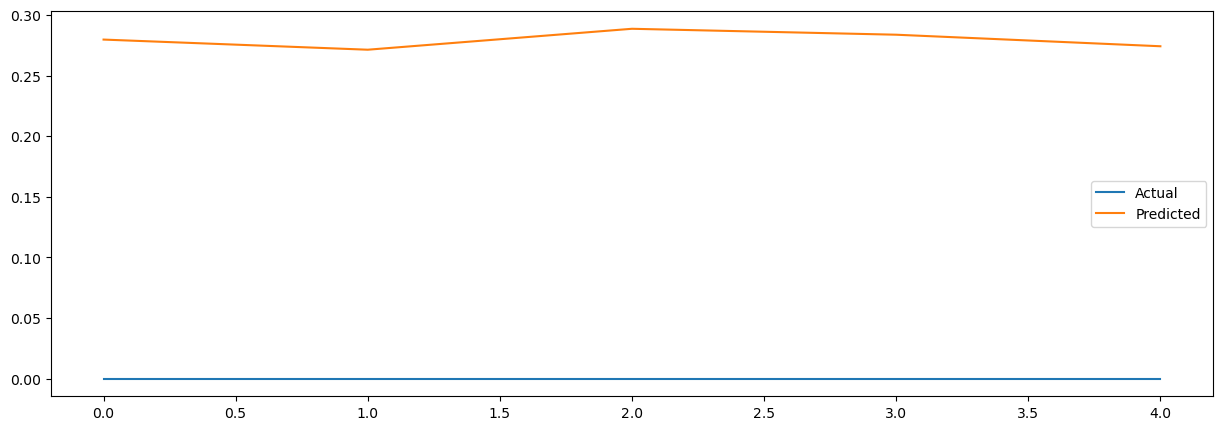

In [43]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()